In [1]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

In [2]:
# para gerar o grafico no browser
%matplotlib inline

In [3]:
# local dos dados e modifica o diretorio
path='/home/ucfilho/Documents/Aulas/Ago_29_2018'
os.chdir(path)

In [4]:
# leitura dos dados
DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv")
#DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv",index_col="emit")

In [5]:
# separa as colunas de interesse
Index=[2,3,4,5,6,7]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
print(Dat_Select.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0          1  0.000000    0.000000  0.000000  0.000000  0.000000
1          1  0.103733    2.549729 -0.689028  1.353022  0.950991
2          1  0.124480    3.628461 -0.835413  1.346323  1.624000
3          1  0.165973    6.374322 -1.864337  1.361538  3.803965
4          1  0.186719    8.217973 -2.301539  1.378858  5.517212


In [6]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [7]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [8]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)
print(DAT.head())
print(DAT_OLD.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0       -1.0 -1.000000   -1.000000 -0.883085 -1.000000 -1.000000
1       -1.0 -0.913570   -0.986458 -0.895478 -0.459481 -0.999415
2       -1.0 -0.896283   -0.980729 -0.898111 -0.462157 -0.999001
3       -1.0 -0.861711   -0.966146 -0.916618 -0.456079 -0.997659
4       -1.0 -0.844425   -0.956354 -0.924482 -0.449160 -0.996605
   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0          1  0.000000    0.000000  0.000000  0.000000  0.000000
1          1  0.103733    2.549729 -0.689028  1.353022  0.950991
2          1  0.124480    3.628461 -0.835413  1.346323  1.624000
3          1  0.165973    6.374322 -1.864337  1.361538  3.803965
4          1  0.186719    8.217973 -2.301539  1.378858  5.517212


In [9]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)
print(train.head())
print("==============")
print(train.shape[0])
print("==============")
print(test.head())
print("==============")
print(test.shape[0])

    Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
34   0.333333 -0.481417   -0.265625 -0.705660  0.730920 -0.809583
44   0.333333  0.866897    0.770833  0.832246  0.352717  0.652982
36   0.333333 -0.135696   -0.078125 -0.054126  0.701848 -0.601610
20  -0.333333 -0.481417   -0.273437 -0.673691  0.730444 -0.811609
42   0.333333  0.728608    0.572917  0.758551  0.371806  0.359479
47
    Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
2   -1.000000 -0.896283   -0.980729 -0.898111 -0.462157 -0.999001
9   -1.000000 -0.135696   -0.018750 -0.168314  0.796046 -0.575951
11  -1.000000  0.210026    0.332812  0.151034  0.786861 -0.193631
15  -1.000000  0.728608    0.626042  0.702954  0.911268  0.405395
21  -0.333333 -0.308557   -0.179688 -0.365206  0.632251 -0.716400
12


In [10]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1]]
x_test=test.iloc[:,[0,1]]
X_OLD=DAT_OLD.iloc[:,[0,1]]
print(x_test.head())
print(x_train.head())
print(X_OLD.head())

    Hydrofoil    Froude
2   -1.000000 -0.896283
9   -1.000000 -0.135696
11  -1.000000  0.210026
15  -1.000000  0.728608
21  -0.333333 -0.308557
    Hydrofoil    Froude
34   0.333333 -0.481417
44   0.333333  0.866897
36   0.333333 -0.135696
20  -0.333333 -0.481417
42   0.333333  0.728608
   Hydrofoil    Froude
0          1  0.000000
1          1  0.103733
2          1  0.124480
3          1  0.165973
4          1  0.186719


In [11]:
# obtem as variaveis dependentes (treino e teste)
Index=[2,3,4,5]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
print(y_test.head())
print(y_train.head())
print(Y_OLD.head())

    Resistence   Sinkage      Trim     Power
2    -0.980729 -0.898111 -0.462157 -0.999001
9    -0.018750 -0.168314  0.796046 -0.575951
11    0.332812  0.151034  0.786861 -0.193631
15    0.626042  0.702954  0.911268  0.405395
21   -0.179688 -0.365206  0.632251 -0.716400
    Resistence   Sinkage      Trim     Power
34   -0.265625 -0.705660  0.730920 -0.809583
44    0.770833  0.832246  0.352717  0.652982
36   -0.078125 -0.054126  0.701848 -0.601610
20   -0.273437 -0.673691  0.730444 -0.811609
42    0.572917  0.758551  0.371806  0.359479
   Resistence   Sinkage      Trim     Power
0    0.000000  0.000000  0.000000  0.000000
1    2.549729 -0.689028  1.353022  0.950991
2    3.628461 -0.835413  1.346323  1.624000
3    6.374322 -1.864337  1.361538  3.803965
4    8.217973 -2.301539  1.378858  5.517212


In [12]:
# define a rede neural 
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(9, 8), 
                    random_state=1)

In [13]:
# treina a rede neural
clf.fit(x_train, y_train)

MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [14]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)

In [15]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names
print(y_calc_train.head())

   Resistence   Sinkage      Trim     Power
0   -0.347830 -0.765609  0.578869 -0.832271
1    0.761697  0.821965  0.357362  0.631524
2   -0.053095 -0.038357  0.780330 -0.604024
3   -0.349773 -0.724958  0.444329 -0.828230
4    0.583787  0.774502  0.402223  0.371054


In [16]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)
print(y_calc_test.head())
print(y_calc_train.head())

   Resistence    Sinkage      Trim        Power
0    4.850712  -2.677035  0.918326     3.933827
1  185.768249  40.595866  4.738046   731.871033
2  228.502238  64.702780  4.759170  1222.242880
3  319.494927  84.629823  4.567697  2390.859170
4  157.026160  27.823479  4.096709   473.702198
   Resistence    Sinkage      Trim        Power
0  122.795648   6.531303  3.952210   272.568540
1  331.705866  94.795489  3.397736  2651.313898
2  178.290611  46.964266  4.456506   643.482028
3  122.429746   8.791367  3.615431   279.135238
4  298.207640  92.156709  3.510032  2228.036882


In [17]:
# recupera os dados originais 
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

In [18]:
# escolhe uma das resposta para fazer o grafico (resistencia-treino)
resist_obs_train=[]
resist_calc_train=[]
resist_calc_train=y_calc_train['Resistence'].copy()
resist_obs_train=train['Resistence'].copy()

In [19]:
# escolhe uma das resposta para fazer o grafico (resistencia-teste)
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test['Resistence'].copy()
resist_obs_test=test['Resistence'].copy()
print(resist_calc_test.head())

0      4.850712
1    185.768249
2    228.502238
3    319.494927
4    157.026160
Name: Resistence, dtype: float64


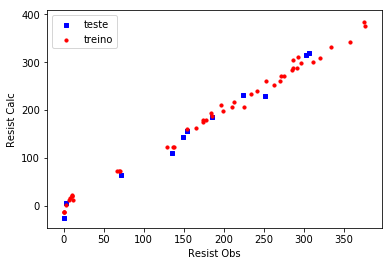

In [20]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Resist Calc')
plt.xlabel('Resist Obs')
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [22]:
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)

MSE teste= 188.577441827
R^2 teste= 0.980039511731


In [23]:
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

MSE treino= 76.5471897087
R^2 treino= 0.99434591039
